#### Import Necessary Libraries

In [22]:
import pandas as pd
import os

#### Task #1: Merging the datasets.

In [23]:
merging_df = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]  # extracting all csv files

for file in files:
    df1 = pd.read_csv("./Sales_Data/" + file) # converting a csv file to dataframe
    merging_df= pd.concat([merging_df, df1])

merging_df.to_csv("All_Data.csv", index = False)

#### Read in updated DataFrame

In [24]:
df = pd.read_csv("All_Data.csv")
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Data Cleaning

##### Droping NaN's rows

In [25]:
nan_df = df[df.isna().any(axis=1)]  # finding NaN's rows
nan_df.head()
df = df.dropna(how='any')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##### Dealing "Or's" values

In [26]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##### Modifying Columns as per their Data Types

In [27]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Task 2: Add Month Column

In [28]:

df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
#df['Month'] = pd.to_numeric(df['Month'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##### Task 3: Adding a sales Column

In [29]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df = df[['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
         'Sales',  'Month','Order Date', 'Purchase Address']]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,600.00,12,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,11.95,12,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,149.99,12,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,11.95,12,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##### Task 4: Adding a City Column

In [30]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2][1:3]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,12/30/19 00:01,"136 Church St, New York City, NY 10001",New York City (NY)
1,295666,LG Washing Machine,1,600.00,600.00,12,12/29/19 07:03,"562 2nd St, New York City, NY 10001",New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,11.95,12,12/12/19 18:21,"277 Main St, New York City, NY 10001",New York City (NY)
3,295668,27in FHD Monitor,1,149.99,149.99,12,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,11.95,12,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",Atlanta (GA)


### Question 1: What was the best month for sale? And, how much was earned that month?

##### Getting up Total Sales per Month

In [31]:
total = df.groupby('Month').sum()['Sales']
total

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

##### Plotting Sales Data

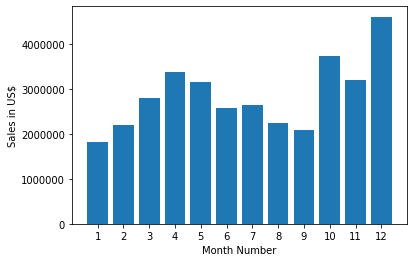

In [32]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, total)
plt.xticks(months)
plt.ylabel('Sales in US$')
plt.xlabel('Month Number')
plt.show()

December has most sales

### Question 2: What City had the highest number of sales?

##### Getting up total sales per City

In [33]:
city_total = df.groupby('City').sum()['Sales']
city_total

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

##### Plotting Sales Data per City

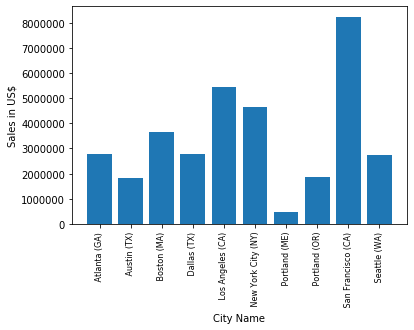

In [34]:
import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby('City')]
plt.bar(cities, city_total)
plt.xticks(cities, rotation = 'vertical', size=8)
plt.ylabel('Sales in US$')
plt.xlabel('City Name')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

##### Modifying Data to extract Time meaningfully

In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City (NY)
1,295666,LG Washing Machine,1,600.00,600.00,12,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,11.95,12,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City (NY)
3,295668,27in FHD Monitor,1,149.99,149.99,12,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,11.95,12,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta (GA)


In [36]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,600.00,12,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,11.95,12,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,149.99,12,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,11.95,12,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta (GA),12,38


##### Plotting data for orders places per hour

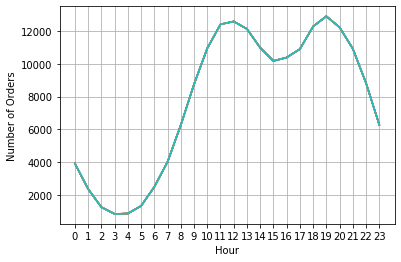

In [37]:
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Month,Order Date,Purchase Address,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,1700.00,12,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,600.00,12,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,11.95,12,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,149.99,12,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,11.95,12,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta (GA),12,38


In [46]:
dff = df[df['Order ID'].duplicated(keep=False)]

dff['Grouped'] = dff.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dff = dff[['Order ID', 'Grouped']].drop_duplicates()
dff.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


##### Counting unique entries per grouped item

In [48]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dff['Grouped']:
    sub_list = row.split(',')  # for splitting items in Grouped
    count.update(Counter(combinations(sub_list, 2)))  # 2 means number of 2 items ordered together.
                                                      # can be changed to 3 or etc
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it is sold the most?

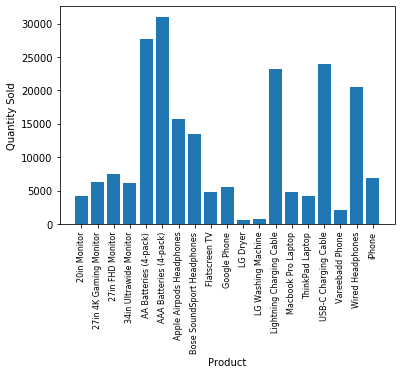

In [52]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()